In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/grains.csv')

In [3]:
data.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,target
138,15.60,15.11,0.8580,5.832,3.286,2.725,5.752,1
126,18.65,16.41,0.8698,6.285,3.594,4.391,6.102,1
68,14.37,14.39,0.8726,5.569,3.153,1.464,5.300,0
156,11.34,12.87,0.8596,5.053,2.849,3.347,5.003,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0


In [4]:
data['target'].value_counts()

0    70
1    70
2    70
Name: target, dtype: int64

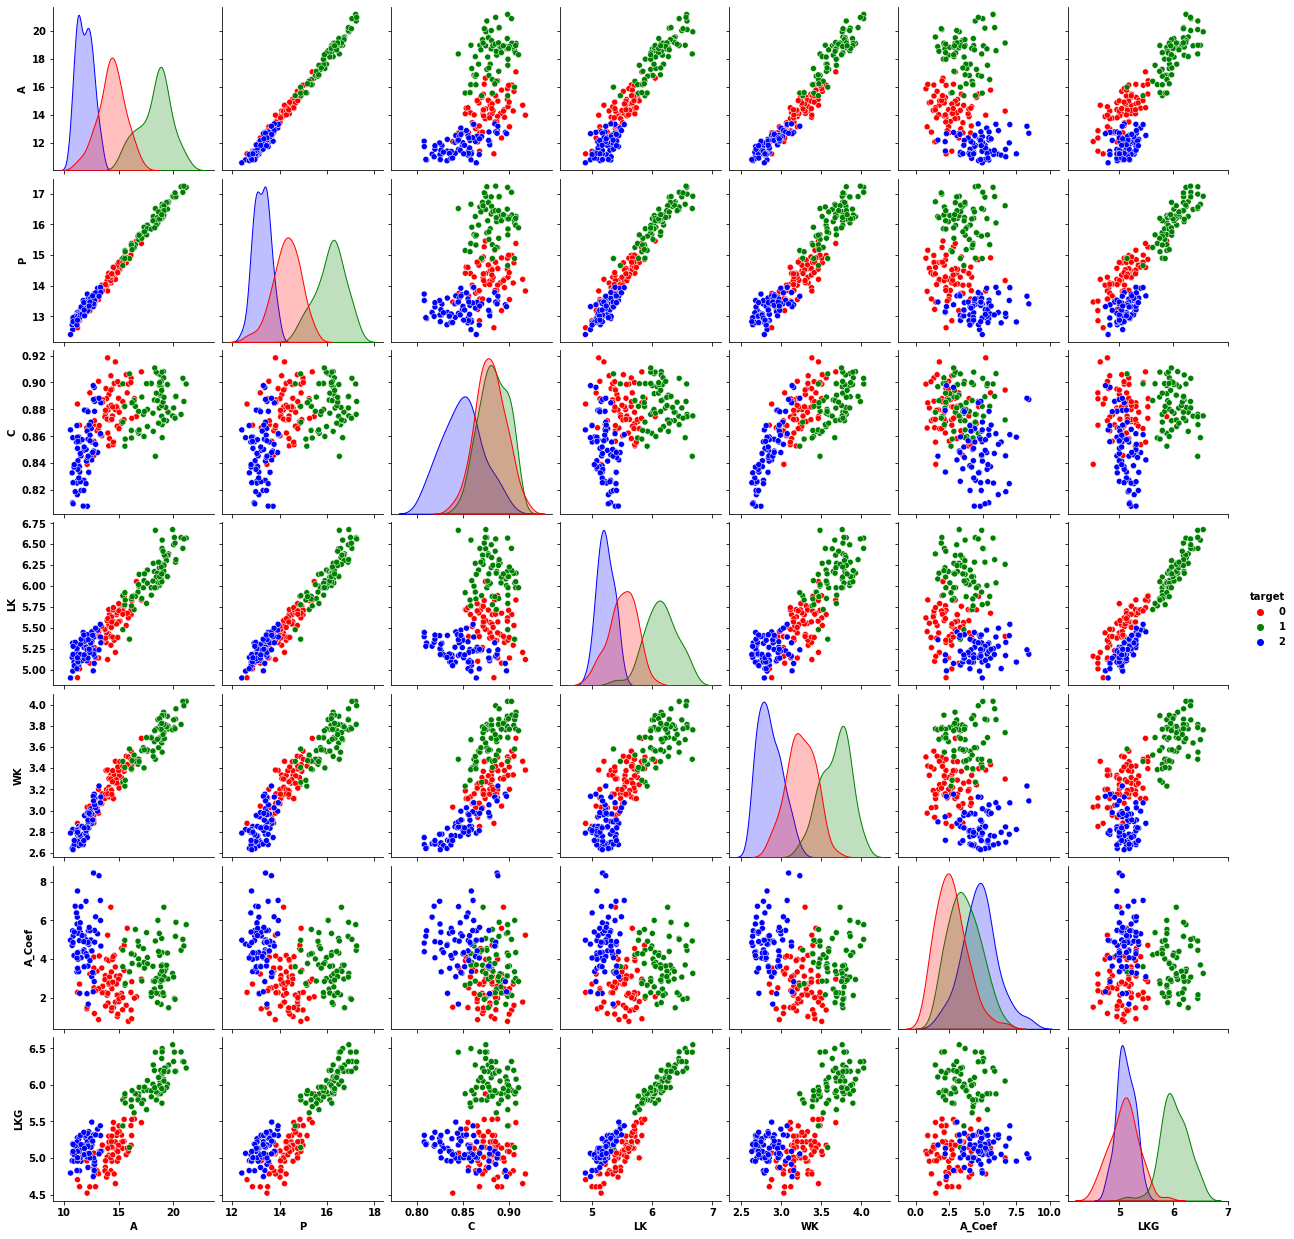

In [9]:
sns.pairplot(data=data, vars=data.columns[:-1], hue=data.columns[-1], palette=['red', 'green', 'blue'])
plt.show()

In [10]:
data.corr()

,A,P,C,LK,WK,A_Coef,LKG,target
A,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
P,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
C,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
LK,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
WK,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
A_Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
LKG,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
target,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [13]:
df = data.iloc[:,:-1]

In [14]:
from sklearn.cluster import KMeans

In [15]:
err=[]
for i in range(1,15):
    km= KMeans(n_clusters = i)
    km.fit(df)
    err.append(km.inertia_)

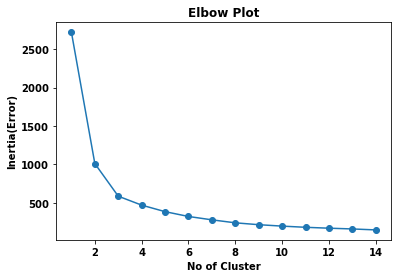

In [16]:
#Elbow plot

plt.plot(range(1,15),err, marker = 'o')

plt.xlabel('No of Cluster')
plt.ylabel('Inertia(Error)')
plt.title('Elbow Plot')

plt.show()

In [17]:
km = KMeans(n_clusters=3, random_state=100)
km.fit(X=df)

KMeans(n_clusters=3, random_state=100)

In [18]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
df_k = df.copy()

In [20]:
df_k.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [21]:
df_k['labels'] = km.labels_

In [22]:
df_k.head()

,A,P,C,LK,WK,A_Coef,LKG,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


### Hierarchical Clustering

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

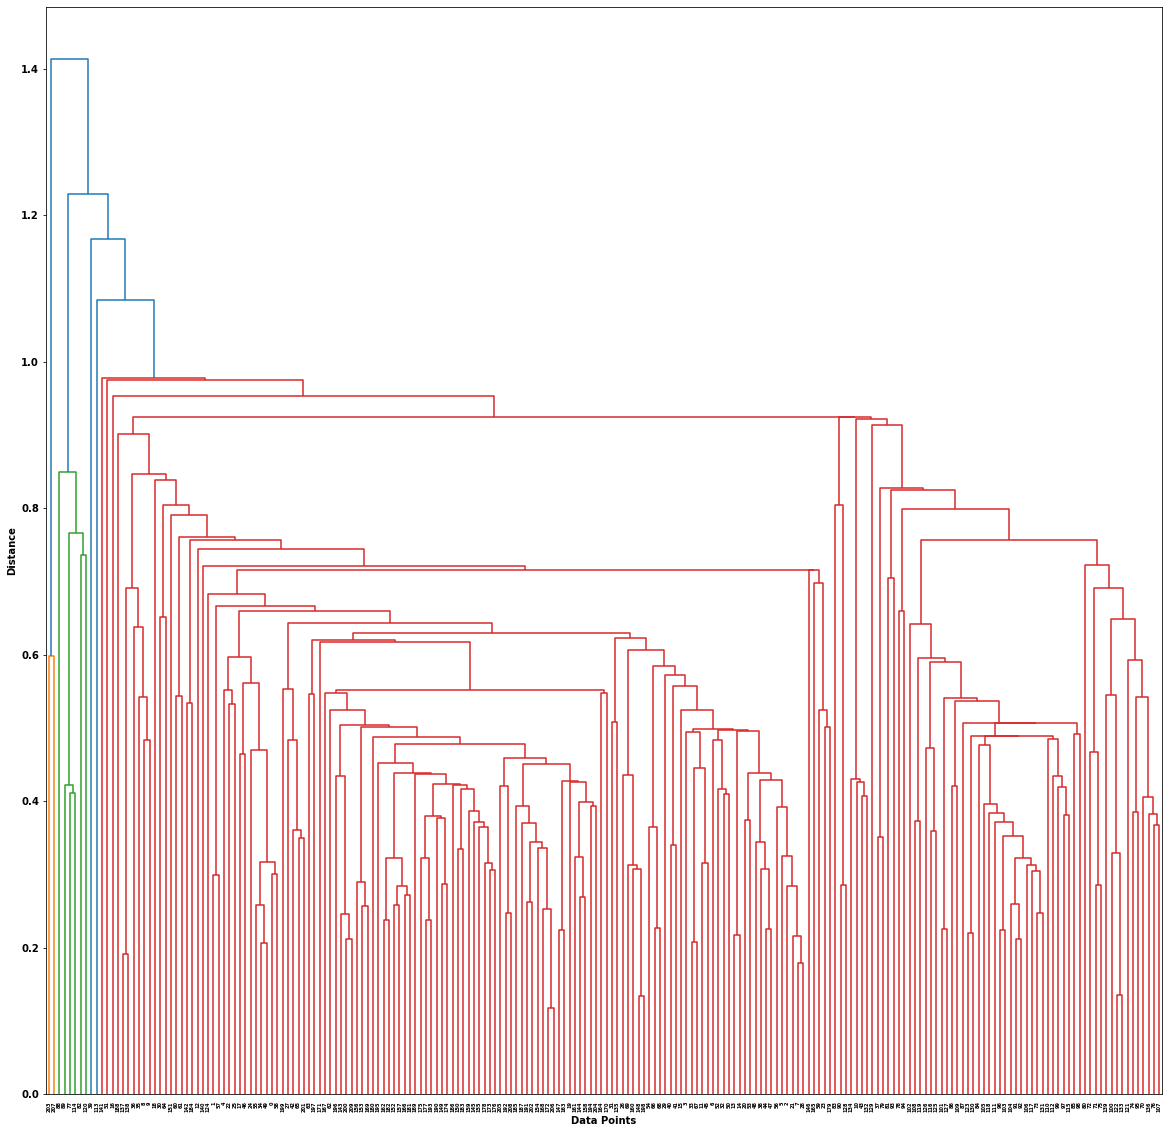

In [24]:
plt.figure(figsize=(20, 20))
Z = linkage(df, method='single')
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

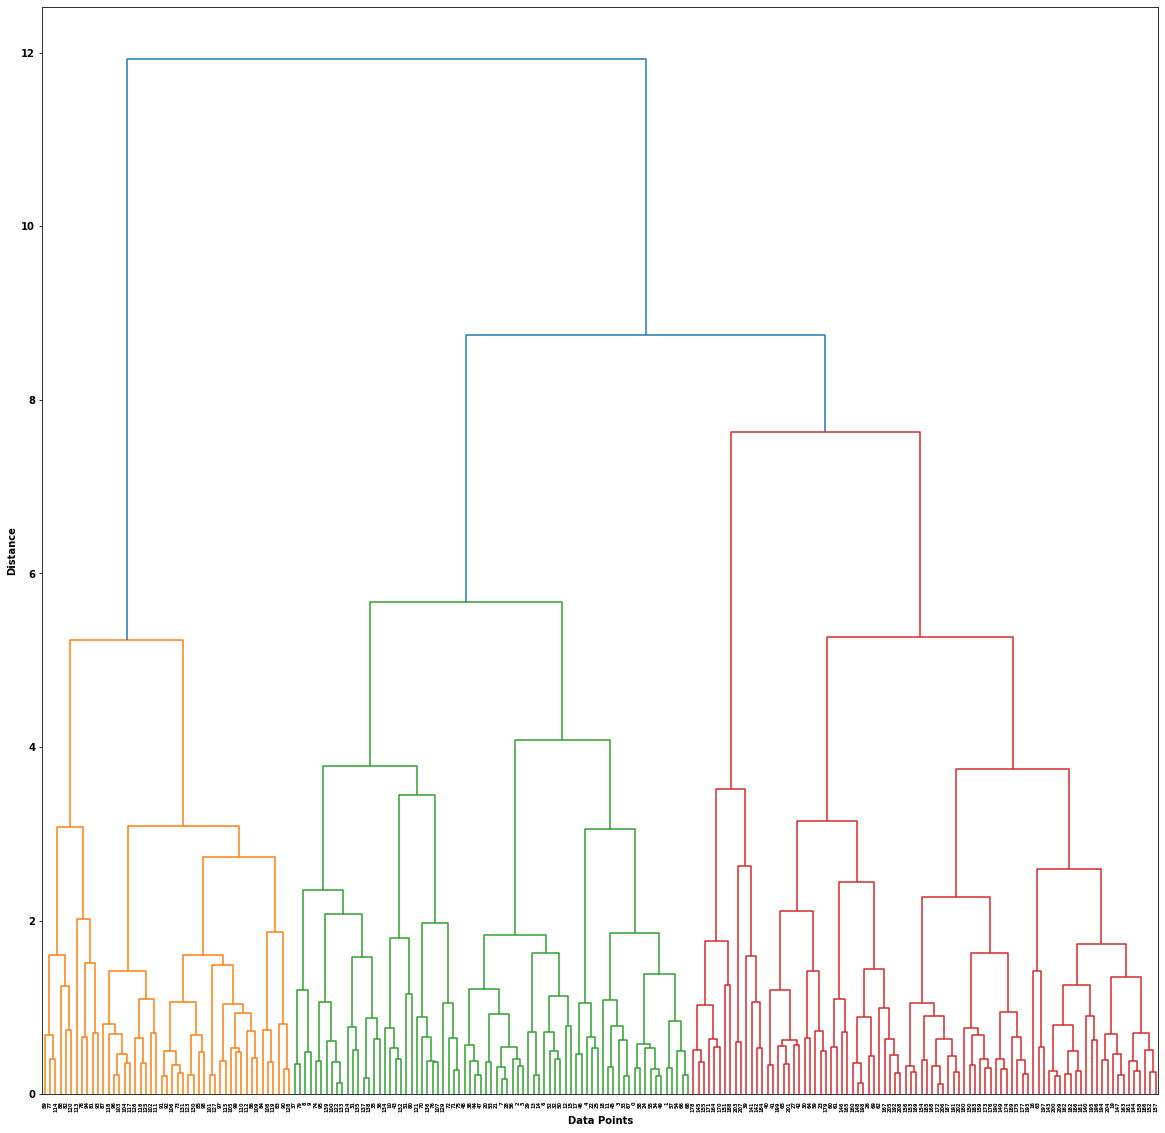

In [25]:
plt.figure(figsize=(20, 20))
Z = linkage(df, method='complete')
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

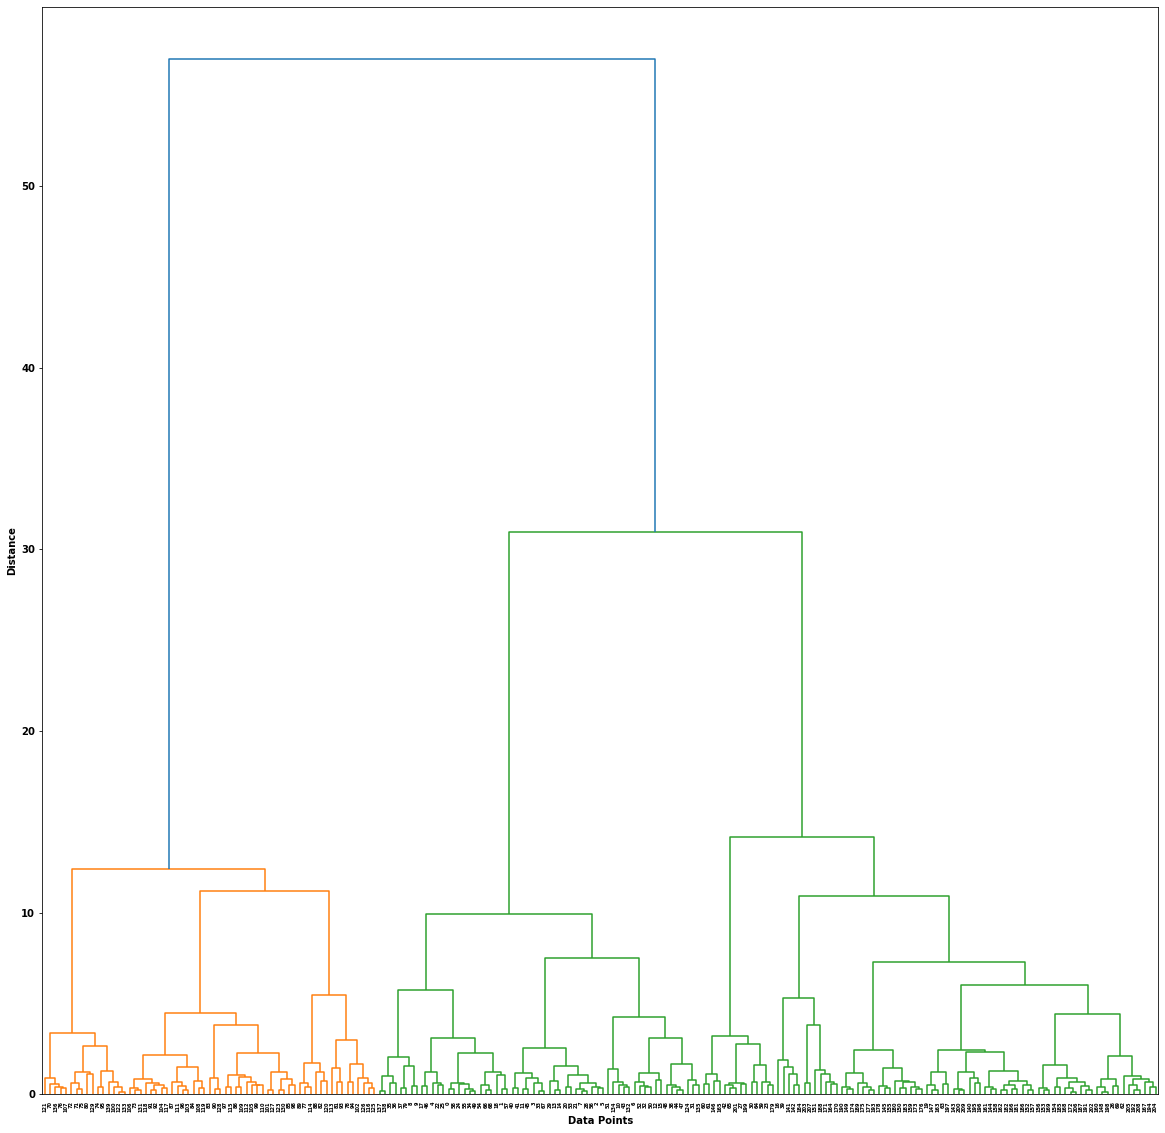

In [26]:
plt.figure(figsize=(20, 20))
Z = linkage(df, method='ward')
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

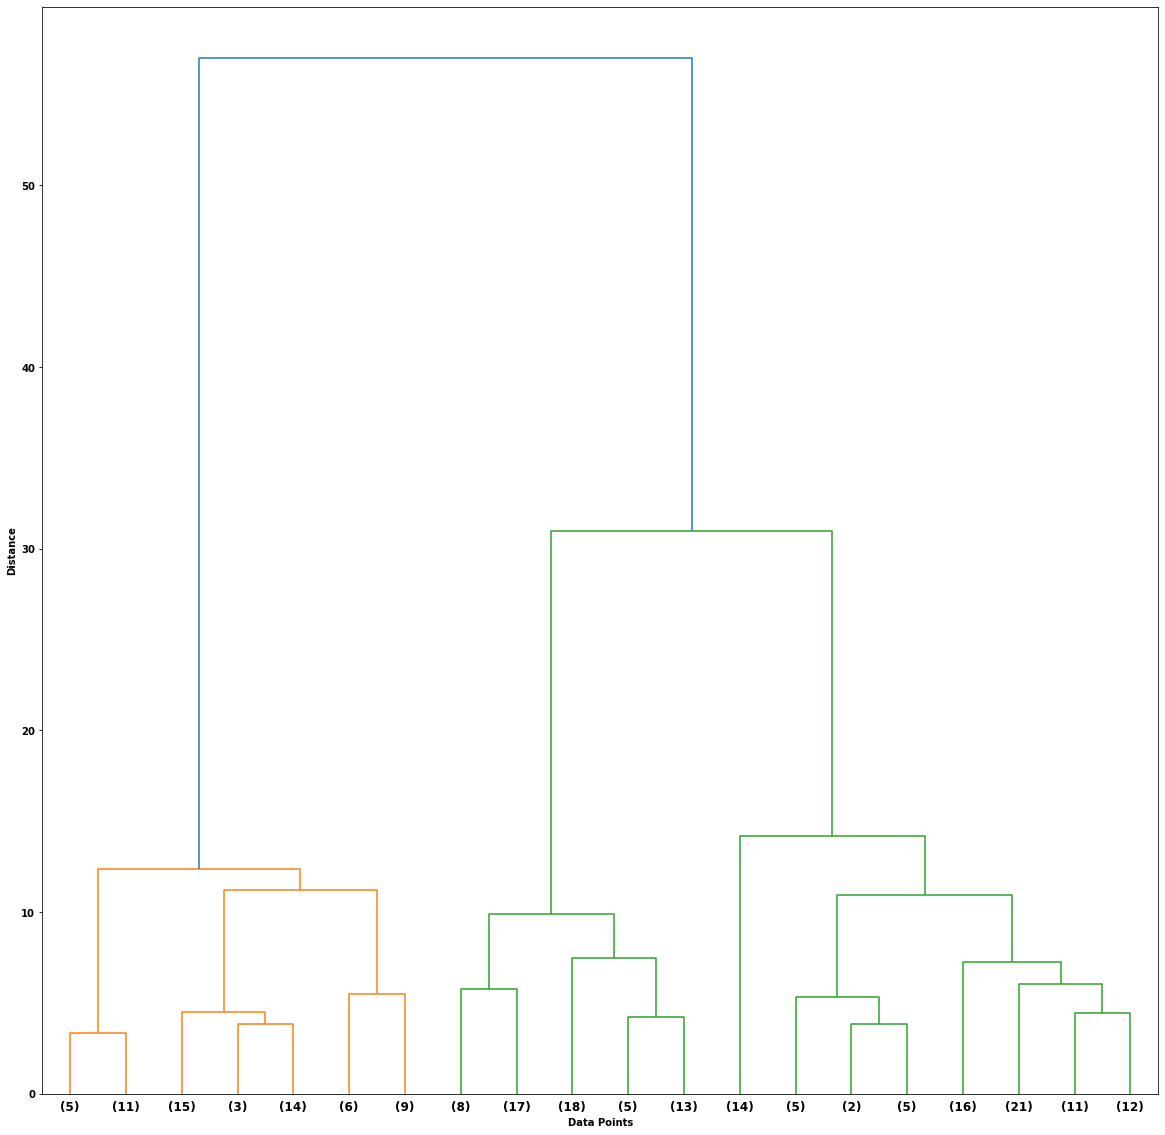

In [27]:
plt.figure(figsize=(20, 20))
Z = linkage(df, method='ward')
dendrogram(Z, truncate_mode='lastp', p=20)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

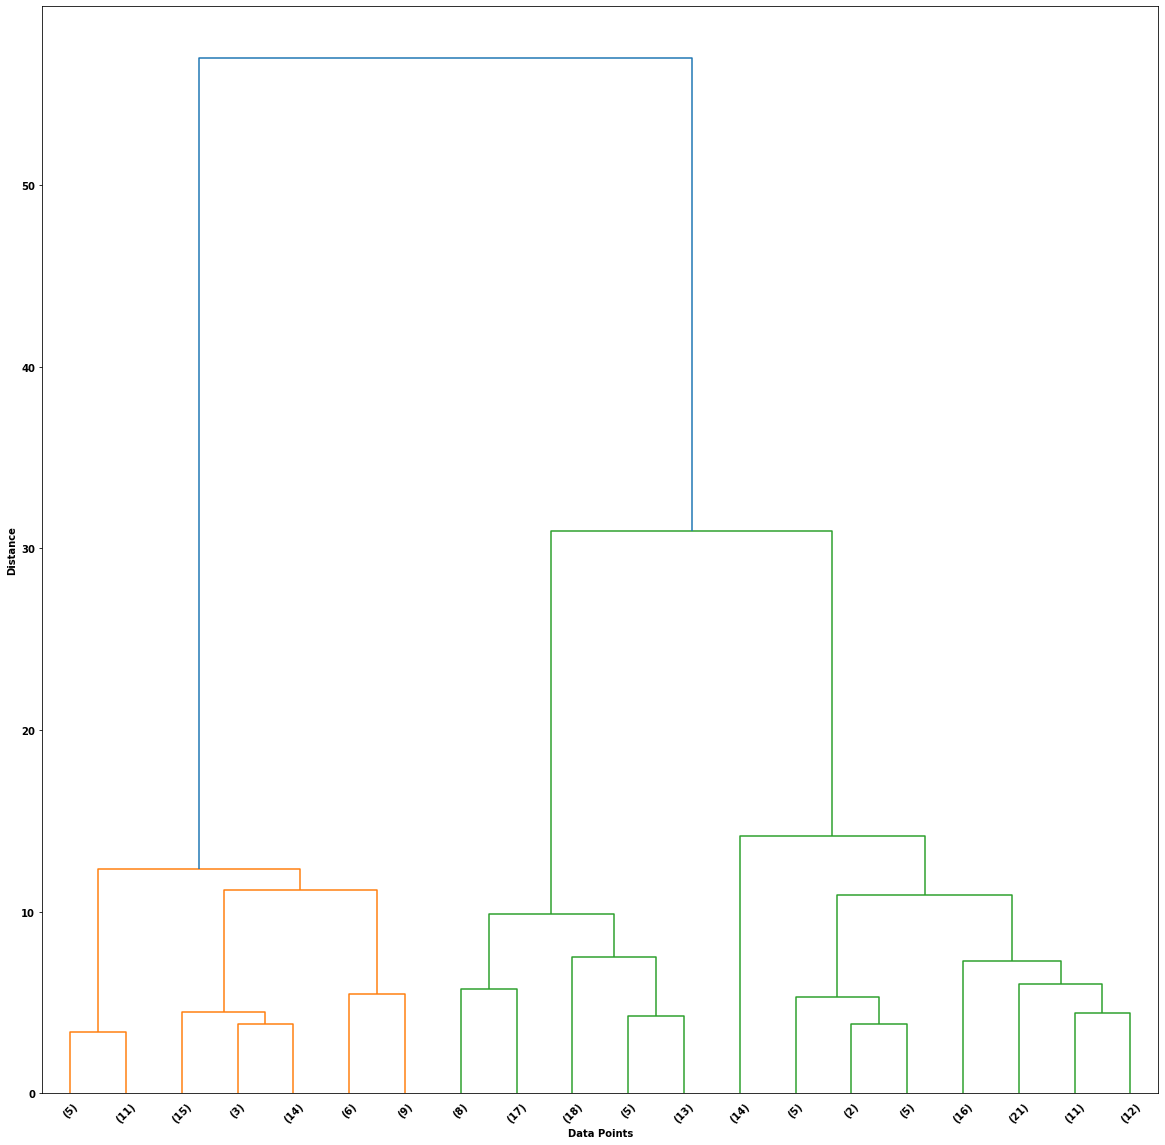

In [28]:
plt.figure(figsize=(20, 20))
Z = linkage(df, method='ward')
dendrogram(Z, truncate_mode='lastp', p=20, leaf_font_size=10, leaf_rotation=45)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [29]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [30]:
Z = linkage(df, 'complete')
c, coph_dists = cophenet(Z, pdist(df))
print(c)
print(coph_dists)

0.7430852289018304
[1.38897068 4.07710432 1.85744194 ... 7.63176672 7.63176672 5.27070677]


In [31]:
Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z, pdist(df))
print(c)
print(coph_dists)

0.7542001445355778
[ 2.25244155  9.90021754  9.90021754 ... 10.91946815 10.91946815
  6.0322743 ]


In [32]:
Z = linkage(df, 'single')
c, coph_dists = cophenet(Z, pdist(df))
print(c)
print(coph_dists)

0.6166208534871138
[0.66671658 0.65924767 0.65924767 ... 1.41339697 1.41339697 0.50407945]


In [37]:
link = ['single','complete','average','centroid','ward']

for l in link:
    Z=linkage(df,l)
    c, coph_dists = cophenet(Z , pdist(df))
    print('Cophenetic Coeff for',l, 'linkage is',c)


Cophenetic Coeff for single linkage is 0.6166208534871138
Cophenetic Coeff for complete linkage is 0.7430852289018304
Cophenetic Coeff for average linkage is 0.7642125325970524
Cophenetic Coeff for centroid linkage is 0.7510516782261056
Cophenetic Coeff for ward linkage is 0.7542001445355778


In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
agg = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean')

In [40]:
agg.fit(df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [41]:
agg.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
df_h = df.copy()
df_h['labels'] = agg.labels_
df_h.head()

,A,P,C,LK,WK,A_Coef,LKG,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


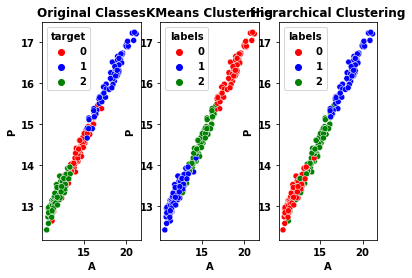

In [43]:
ax1=plt.subplot(1,3,1)
plt.title("Original Classes")
sns.scatterplot(x='A', y='P',hue = 'target', ax=ax1,data = data, palette=['r','b','g'] )


ax2=plt.subplot(1,3,2)
plt.title("KMeans Clustering")
sns.scatterplot(x='A', y='P',hue = 'labels',ax=ax2, data = df_k, palette=['r','b','g'] )



ax3=plt.subplot(1,3,3)
plt.title("Hierarchical Clustering")
sns.scatterplot(x='A', y='P',hue = 'labels', ax=ax3,data = df_h,palette=['r','b','g'])
plt.show()


### Classification Algorithm

In [44]:
x = df_k.drop('labels', axis=1)
y = df_k['labels']

In [45]:
from sklearn.model_selection import train_test_split